# Data Analysis on an IPL dataset

Dataset source : [link](https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020?select=IPL+Matches+2008-2020.csv)  
**Note**: Only the 'IPL Matches 2008-2020.csv' is used.

The available dataset gives us basic information about the 816 IPL matches held between 2008 - 2020, like the teams involved in each match, the toss winner, the toss decision, venue, eventual winner, the manner of victory etc.  
  
We attempt to find out the following :
1. The number of matches played each season.
2. The number of wins per each team, and their win %.
3. Which was the more popular choice for the toss winner - batting or fielding? And how did winning the toss influence the chances of winning the game?
4. Who are more successful - teams batting first, or teams batting second?
5. Dividing the wins per each team into victories after batting first, and victories after batting second. Is there any pattern between the two? Are there teams who are significantly better in one scenario than the other?
6. Analysing Player of The Match winners. 

In [150]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as plot

In [151]:
import chart_studio.plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [152]:
matches = pd.read_csv('IPL Matches 2008-2020.csv')

In [153]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


## Replacing Team names with short-forms  
  
**Note : Both Sunrisers Hyderabad and Deccan Chargers are considered as SRH, and Delhi Daredevils and Delhi Capitals are considered as DC**

In [154]:
x=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

matches.replace(x,y,inplace = True)

In [155]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DC,RR,RR,bat,DC,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,SRH,SRH,bat,KKR,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,RCB,MI,MI,field,RCB,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,MI,DC,DC,field,MI,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,RCB,SRH,SRH,field,SRH,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,DC,SRH,DC,bat,DC,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [156]:
%matplotlib inline

In [157]:
matches['season'] = matches['date'].str[:4].astype(int)

In [158]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DC,RR,RR,bat,DC,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,SRH,SRH,bat,KKR,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,RCB,MI,MI,field,RCB,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,MI,DC,DC,field,MI,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,RCB,SRH,SRH,field,SRH,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,DC,SRH,DC,bat,DC,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


## Plotting a histogram showing the number of games played each season

In [159]:
data = [go.Histogram(x=matches['season'], marker=dict(color='#EB89B5', line=dict(color='#000000', width=1)), opacity=0.75)]
layout = go.Layout(title='Matches In Every Season ',xaxis=dict(title='Season',tickmode='linear'),
                    yaxis=dict(title='Count'),bargap=0.2, plot_bgcolor='rgb(245,245,245)')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Calculating the overall number of games played, and number of wins per team

In [160]:
matches_played=pd.concat([matches['team1'],matches['team2']])

In [161]:
matches_played=matches_played.value_counts().reset_index()

In [162]:
matches_played.columns=['Team','Total Matches']

In [163]:
matches_played

,Team,Total Matches
0,MI,203
1,SRH,199
2,RCB,195
3,DC,194
4,KKR,192
5,KXIP,190
6,CSK,178
7,RR,161
8,PW,46
9,GL,30


In [164]:
win_count = matches['winner'].value_counts().reset_index()

In [165]:
win_count.columns = ['Team','Wins']

In [166]:
win_count

,Team,Wins
0,MI,120
1,CSK,106
2,KKR,99
3,SRH,95
4,RCB,91
5,KXIP,88
6,DC,86
7,RR,81
8,RPS,15
9,GL,13


Matching each corresponding team column in 'matches_played' with the number of wins from 'win_count'

In [167]:
def wins_column(row):
    return int(win_count.loc[win_count.Team == row['Team']].Wins)

In [168]:
matches_played['Wins'] = matches_played.apply(lambda row : wins_column(row), axis = 1)

In [169]:
matches_played

,Team,Total Matches,Wins
0,MI,203,120
1,SRH,199,95
2,RCB,195,91
3,DC,194,86
4,KKR,192,99
5,KXIP,190,88
6,CSK,178,106
7,RR,161,81
8,PW,46,12
9,GL,30,13


In [170]:
matches_played

,Team,Total Matches,Wins
0,MI,203,120
1,SRH,199,95
2,RCB,195,91
3,DC,194,86
4,KKR,192,99
5,KXIP,190,88
6,CSK,178,106
7,RR,161,81
8,PW,46,12
9,GL,30,13


In [171]:
totm = matches_played.reset_index()

trace = [go.Table(
    header=dict(values=["Team","Total Matches","Wins"],
                fill = dict(color='#ff96ea'),
                font = dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                align = ['center'],
               height = 30),
    cells=dict(values=[totm['Team'], totm['Total Matches'], totm['Wins']],
               fill = dict(color=['rgb(235, 193, 238)', 'rgba(228, 222, 249, 0.65)']),
               align = ['center'], font_size=13, height=25))]

layout = dict(
    width=750,
    height=520,
    autosize=False,
    title='Total Matches vs Wins per team',
    margin = dict(t=100),
    showlegend=False,    
)

fig1 = dict(data=trace, layout=layout)
iplot(fig1)

## Representing No. of matches played, No. of wins, and Win % in graphical form

In [172]:
trace1 = go.Bar(x=matches_played.index,y=matches_played['Total Matches'],
                name='Total Matches',opacity=0.4)

trace2 = go.Bar(x=matches_played.index,y=matches_played['Wins'],
                name='Matches Won',marker=dict(color='red'),opacity=0.4)

trace3 = go.Bar(x=matches_played.index,
               y=(round(matches_played['Wins']/matches_played['Total Matches'],3)*100),
               name='Win Percentage',opacity=0.6,marker=dict(color='gold'))

data = [trace1, trace2, trace3]

layout = go.Layout(title='Match Played, Wins And Win Percentage',xaxis=dict(title='Team'),
                   yaxis=dict(title='Count'),bargap=0.2,bargroupgap=0.1, plot_bgcolor='rgb(245,245,245)')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Printing out win % in descending order...

In [173]:
win_percentage = round(matches_played['Wins']/matches_played['Total Matches'],3)*100
win_percentage.sort_values(ascending = False)

6     59.6
0     59.1
4     51.6
7     50.3
10    50.0
1     47.7
2     46.7
5     46.3
3     44.3
9     43.3
11    42.9
8     26.1
dtype: float64

In [174]:
win_percentage.mean()

47.324999999999996

## Some observations
  
1. The average win % in the league is 47.32%.
2. We can see that the 2 most successful teams, Mumbai Indians(**MI**) and Chennai Super Kings(**CSK**), have a significantly better win % than the rest.  
3. Rajastan Royals(**RR**) is a comparative surprise with the 4th highest win %, since teams like Sunrisers Hyderabad(**SRH**) have performed better in terms of league positions(especially in recent years).  
4. Rising Pune SuperGiants(**RPS**) and Gujarat Lions(**GL**) only played a couple seasons each, and have fared decently(especially RPS with a respectable 50% win %).  
5. Pune Warriors(**PW**) are easily the worst team to have played in the league, with a dismal 26.1% winning rate. They finished with less number of wins than GL and RPS, even though PW played a season extra(i.e. 16 games more).  
6. Kochi Tuskers(**KTK**) only played a single season, and finished with a win % of 42.9%.

Let's add Win % as a column in 'matches_played'...

In [175]:
def win_percentage(row):
    return round(row['Wins']/row['Total Matches'],3)*100

In [176]:
matches_played['Win %'] = matches_played.apply(lambda row : win_percentage(row), axis = 1)

In [177]:
matches_played

,Team,Total Matches,Wins,Win %
0,MI,203,120,59.1
1,SRH,199,95,47.7
2,RCB,195,91,46.7
3,DC,194,86,44.3
4,KKR,192,99,51.6
5,KXIP,190,88,46.3
6,CSK,178,106,59.6
7,RR,161,81,50.3
8,PW,46,12,26.1
9,GL,30,13,43.3


In [178]:
sort_percentage = matches_played.sort_values('Win %', inplace = False)

<AxesSubplot:xlabel='Team', ylabel='Win %'>

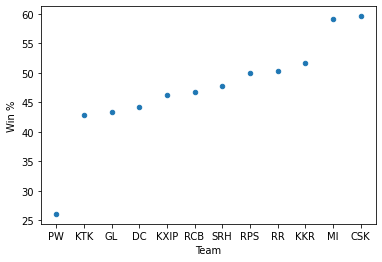

In [179]:
sort_percentage.plot(x = 'Team',y = 'Win %',kind = 'scatter')

From this scatter plot, we can see 2 teams significantly outperforming others(**MI** and **CSK**), 9 teams comparatively close to each other in the middle, and a team with a vastly inferior win %(**PW**).

## Analysing choice after winning the toss

In [180]:
data = [go.Bar(
    x = matches["toss_decision"].value_counts().index,
    y = matches["toss_decision"].value_counts().values,
    marker = dict(line=dict(color='#000000', width=1))
)]

layout = go.Layout(
   {
      "title":"Most Likely Decision After Winning Toss",
       "xaxis":dict(title='Decision'),
       "yaxis":dict(title='Number of Matches'),
       "plot_bgcolor":'rgb(245,245,245)'
   }
)
fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [181]:
(matches['toss_decision'].value_counts()) * 100/816

field    60.784314
bat      39.215686
Name: toss_decision, dtype: float64

**Interestingly, we find a clear preference by the toss winner to field first(chosen 496 times, as compared to choosing to bat first 320 times).  
Fielding was chosen by 60.78% of the toss winners.**

In [182]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DC,RR,RR,bat,DC,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,SRH,SRH,bat,KKR,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [183]:
matches.count()

id                 816
city               803
date               816
player_of_match    812
venue              816
neutral_venue      816
team1              816
team2              816
toss_winner        816
toss_decision      816
winner             812
result             812
result_margin      799
eliminator         812
method              19
umpire1            816
umpire2            816
season             816
dtype: int64

In [184]:
matches['result'].count()

812

In [185]:
(matches.loc[matches.winner == matches.toss_winner]['winner'].count()*100)/812

51.477832512315274

In [186]:
(matches.loc[matches.winner != matches.toss_winner]['winner'].count()*100)/812

48.522167487684726

**We can see that 51.48% of the games were won by the toss winner. It means that even though the toss winner is slightly more likely to win, the impact isn't significant.**

In [187]:
(matches.loc[matches.result == 'runs']['winner'].count()/812) * 100

44.827586206896555

In [188]:
(matches.loc[matches.result == 'wickets']['winner'].count()/812) * 100

53.57142857142857

In [189]:
(matches.loc[matches.result == 'tie']['winner'].count()/812) * 100

1.600985221674877

In [190]:
win_type = pd.DataFrame()
win_type['Type'] = ['bat first','bowl first','tie']
win_type['Percentage'] = [44.827586206896555,53.57142857142857,1.600985221674877]

In [191]:
win_type

,Type,Percentage
0,bat first,44.827586
1,bowl first,53.571429
2,tie,1.600985


**We see that the team chasing(i.e. bowling first), has a noticeably better chance at winning a game(53.5%). This might be due to dew(especially in evening games), and the fact that knowing the target allows teams to plan better and chase according to a plan.**

Text(0, 0.5, '')

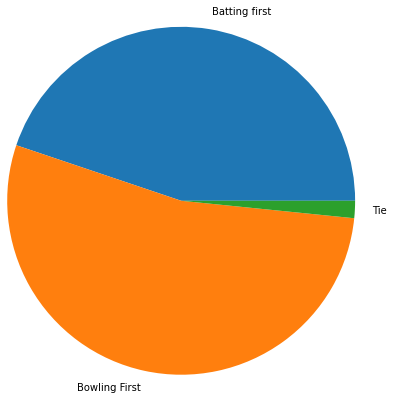

In [192]:
labels = ['Batting first','Bowling First', 'Tie']
win_type.plot(kind='pie',labels = labels, y = 'Percentage',legend = None, radius = 2).set_ylabel('')

## Calculating % of each team's victories, with regards to when they batted(first or second)

In [193]:
win_runs = pd.DataFrame()
win_runs = matches.loc[matches.result == 'runs'].groupby(['winner']).count()['id'].sort_values(ascending = False)

In [194]:
win_runs.reset_index()

,winner,id
0,MI,62
1,CSK,53
2,SRH,52
3,KKR,41
4,KXIP,40
5,RCB,38
6,DC,34
7,RR,28
8,RPS,7
9,PW,6


In [195]:
win_wickets = pd.DataFrame()
win_wickets = matches.loc[matches.result == 'wickets'].groupby(['winner']).count()['id'].sort_values(ascending = False)

In [196]:
win_wickets.reset_index()
win_wickets.columns = ['winner','wickets']

In [197]:
win_wickets

winner
KKR     57
MI      56
CSK     53
RCB     51
RR      51
DC      50
KXIP    45
SRH     42
GL      12
RPS      8
PW       6
KTK      4
Name: id, dtype: int64

In [198]:
result = pd.merge(win_runs,win_wickets,on='winner')

In [199]:
result

,id_x,id_y
winner,,
MI,62,56
CSK,53,53
SRH,52,42
KKR,41,57
KXIP,40,45
RCB,38,51
DC,34,50
RR,28,51
RPS,7,8


In [200]:
result.rename(columns = {'id_x' :'runs','id_y':'wickets'},inplace = True)

In [201]:
result['total'] = result['runs'] + result['wickets']

In [202]:
result

,runs,wickets,total
winner,,,
MI,62,56,118
CSK,53,53,106
SRH,52,42,94
KKR,41,57,98
KXIP,40,45,85
RCB,38,51,89
DC,34,50,84
RR,28,51,79
RPS,7,8,15


In [203]:
result['runs %'] = round((result['runs']/result['total']) * 100,2)
result['wickets %'] = round((result['wickets']/result['total']) * 100,2)

In [204]:
result.sort_values('runs %',ascending = False,inplace = True)

In [205]:
result.reset_index(inplace = True)

In [206]:
result

,winner,runs,wickets,total,runs %,wickets %
0,SRH,52,42,94,55.32,44.68
1,MI,62,56,118,52.54,47.46
2,CSK,53,53,106,50.00,50.00
3,PW,6,6,12,50.00,50.00
4,KXIP,40,45,85,47.06,52.94
5,RPS,7,8,15,46.67,53.33
6,RCB,38,51,89,42.70,57.30
7,KKR,41,57,98,41.84,58.16
8,DC,34,50,84,40.48,59.52
9,RR,28,51,79,35.44,64.56


Here, 'runs %' means the % of total victories they had by 'runs', i.e. after batting first. 'wickets %' denotes the % of victories after batting second.

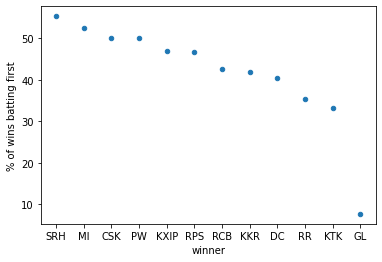

In [207]:
graph = result.plot(x = 'winner',y = 'runs %',kind = 'scatter',ylabel = '% of wins batting first')

In [208]:
graph.axhline(50,0,1)

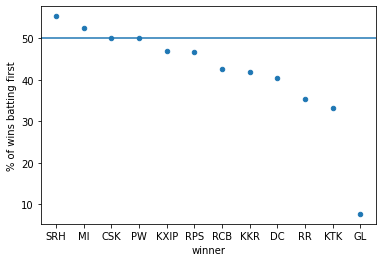

In [209]:
graph.figure

From this, we can see that only 2 teams, **SRH** and **MI**, have more games batting first than second. Two teams, **CSK** and **PW**, have a 50% record. The remaining 8 teams have won more games batting second. The most curious case is **GL**, which has had a whopping 12 out of their 13 wins(92.31 %) batting second! Teams like **RR**, **DC**, **KKR** and **RCB** too have won a lot of matches batting second, compared to batting first.

## Player of The Match(PoTM) awards

In [210]:
matches.value_counts('player_of_match')

player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
KK Cooper          1
KK Ahmed           1
K Rabada           1
JJ Roy             1
Z Khan             1
Length: 233, dtype: int64

We can see that we have had 233 different Player Of The Match winners over the years.

In [211]:
matches.value_counts('player_of_match')[:10]

player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         16
SK Raina          14
V Kohli           13
G Gambhir         13
dtype: int64

No real shockers with the Top 10 winners of the Player Of The Match(PoTM) awards. The only comparative surprise is Yusuf Pathan, who has the joint 6th-most PoTM wins. Also worth a mention is the fact that not a single bowler is in the top 10(even though Watson has made key contributions with the ball, he is an all-rounder as such and not a frontline bowler).

In [212]:
matches.value_counts('player_of_match')[:20]

player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         16
SK Raina          14
V Kohli           13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
V Sehwag          11
DR Smith          11
AD Russell        11
A Mishra          11
KA Pollard        11
JH Kallis         10
AT Rayudu         10
SP Narine          9
dtype: int64

The first bowler to appear on the list is Amit Mishra(with 11 PoTM awards, joint 13th-most). A bit of a surprise, considering one would think the likes of Malinga might have more.

The following code is not related to the data analysis. It is to find out the dependencies used in this Jupyter Notebook file, for the creation of an interactive Binder repo.

In [213]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [214]:
%watermark --iversions

pandas      : 1.2.3
numpy       : 1.20.2
seaborn     : 0.11.1
plotly      : 4.14.3
matplotlib  : 3.4.2
chart_studio: 1.1.0

